In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

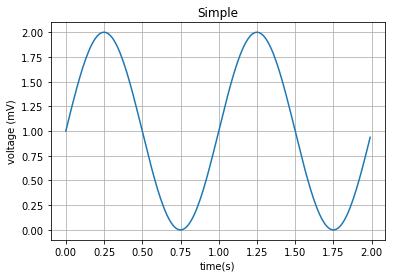

In [2]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# fig = plt.figure()
# ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel = 'time(s)', ylabel='voltage (mV)', title='Simple')
ax.grid()
plt.show()

## Multiple subplots in one figure

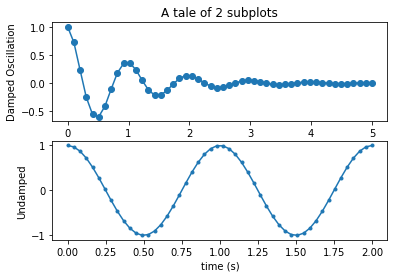

In [13]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * (np.exp(-x1))
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2,1,1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped Oscillation')

plt.subplot(2,1,2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## pcolormesh

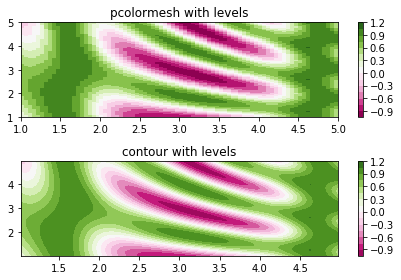

In [20]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# Generate 2 2D grids for x and y bounds
y, x = np.mgrid[slice(1, 5 + dy, dx), slice(1, 5 + dx, dy)]

z = np.sin(x) ** 10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows = 2)
im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels, cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contour with levels')

fig.tight_layout()
plt.show()

## Histogram